<a href="https://colab.research.google.com/github/vpkrishna/mlfundas/blob/main/gda_check_for_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

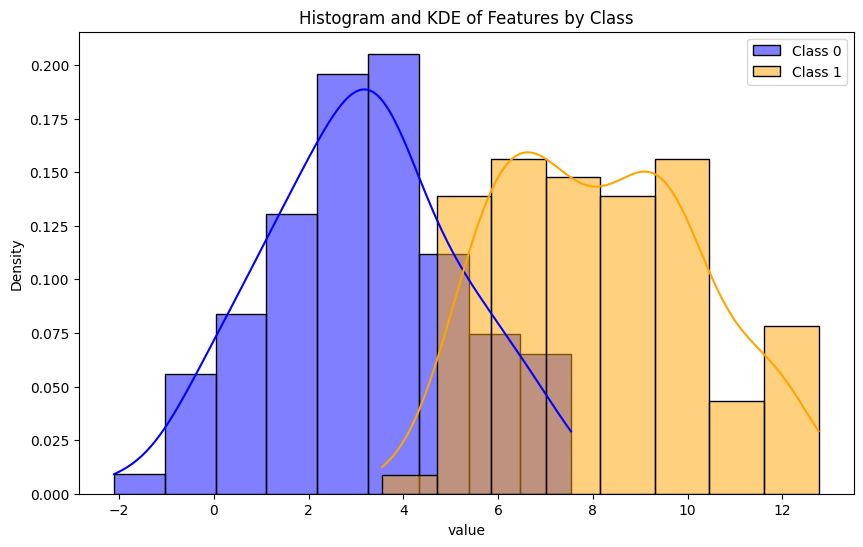

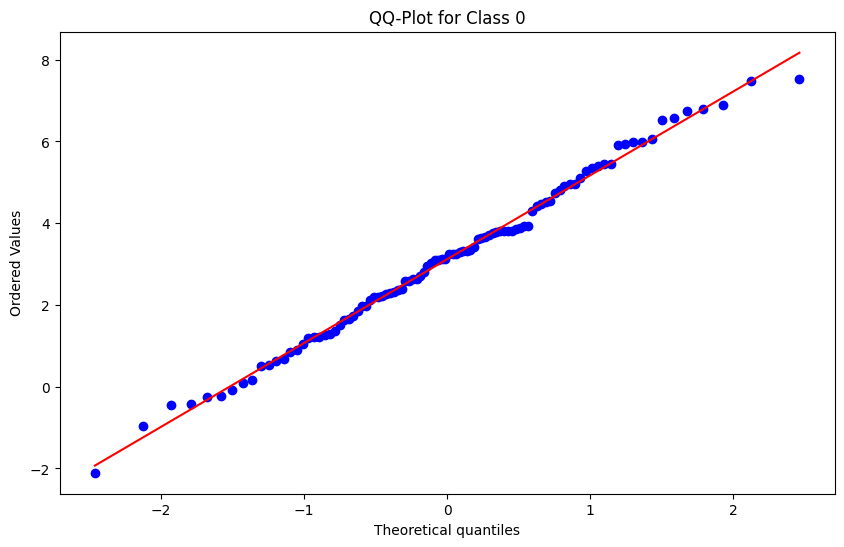

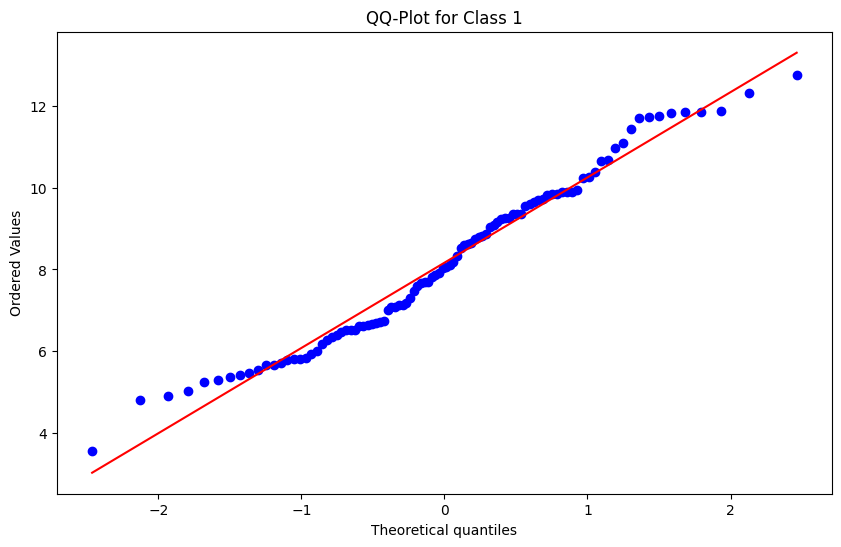

Shapiro-Wilk Test for Class 0: W=0.9926937818527222, p-value=0.8689165711402893
Shapiro-Wilk Test for Class 1: W=0.9735487699508667, p-value=0.04156402125954628
Anderson-Darling Test for Class 0: statistic=0.18097695613924714, critical_values=[0.555 0.632 0.759 0.885 1.053]
Anderson-Darling Test for Class 1: statistic=0.8199816773456234, critical_values=[0.555 0.632 0.759 0.885 1.053]


AttributeError: 'Series' object has no attribute 'reshape'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

# Example dataset
np.random.seed(0)
class_0 = np.random.normal(loc=3, scale=2, size=100)
class_1 = np.random.normal(loc=8, scale=2, size=100)

# Combine into a DataFrame
df = pd.DataFrame({
    'value': np.concatenate([class_0, class_1]),
    'class': np.concatenate([np.zeros(100), np.ones(100)])
})

# Histogram and KDE plots
plt.figure(figsize=(10, 6))
sns.histplot(df[df['class'] == 0]['value'], kde=True, color='blue', label='Class 0', stat='density')
sns.histplot(df[df['class'] == 1]['value'], kde=True, color='orange', label='Class 1', stat='density')
plt.legend()
plt.title('Histogram and KDE of Features by Class')
plt.show()

# QQ-Plots
plt.figure(figsize=(10, 6))
stats.probplot(df[df['class'] == 0]['value'], dist="norm", plot=plt)
plt.title('QQ-Plot for Class 0')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(df[df['class'] == 1]['value'], dist="norm", plot=plt)
plt.title('QQ-Plot for Class 1')
plt.show()

# Shapiro-Wilk Test
shapiro_class_0 = stats.shapiro(df[df['class'] == 0]['value'])
shapiro_class_1 = stats.shapiro(df[df['class'] == 1]['value'])
print(f"Shapiro-Wilk Test for Class 0: W={shapiro_class_0[0]}, p-value={shapiro_class_0[1]}")
print(f"Shapiro-Wilk Test for Class 1: W={shapiro_class_1[0]}, p-value={shapiro_class_1[1]}")

# Anderson-Darling Test
ad_class_0 = stats.anderson(df[df['class'] == 0]['value'], dist='norm')
ad_class_1 = stats.anderson(df[df['class'] == 1]['value'], dist='norm')
print(f"Anderson-Darling Test for Class 0: statistic={ad_class_0.statistic}, critical_values={ad_class_0.critical_values}")
print(f"Anderson-Darling Test for Class 1: statistic={ad_class_1.statistic}, critical_values={ad_class_1.critical_values}")

# Fit Gaussian Mixture Models
gmm_class_0 = GaussianMixture(n_components=1).fit(df[df['class'] == 0]['value'].reshape(-1, 1))
gmm_class_1 = GaussianMixture(n_components=1).fit(df[df['class'] == 1]['value'].reshape(-1, 1))

print(f"GMM for Class 0: mean={gmm_class_0.means_[0]}, covariance={gmm_class_0.covariances_[0]}")
print(f"GMM for Class 1: mean={gmm_class_1.means_[0]}, covariance={gmm_class_1.covariances_[0]}")
